In [118]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

#text pre-porcessing
#!pip install nltk
import nltk
#nltk.download()
from nltk.corpus import stopwords 
from textblob import Word


#visualization
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter


#creating plots
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist


#get labels and emotions
from textblob import TextBlob
from transformers import pipeline


In [59]:
df = pd.read_csv('data/news.csv', sep=';', encoding='utf-8-sig')
df

,newspaper,title,date,abstract,link
0,Mail Online,what could happen in the tech world in 2023?,31.12.2022,the new year is likely to bring more challenge...,https://www.dailymail.co.uk/wires/pa/article-1...
1,Mail Online,metaverse fail virtual reality and augmented r...,29.12.2022,worldwide shipments of virtual and augmented r...,https://www.dailymail.co.uk/sciencetech/articl...
2,Mail Online,crypto rules in 2023 after turbulent year,29.12.2022,the year ahead brings new guard rails for cryp...,https://www.dailymail.co.uk/wires/aap/article-...
3,Mail Online,tech billionaires see wealth shrink amid 2022 ...,29.12.2022,the fortunes of silicon valley billionaires to...,https://www.dailymail.co.uk/wires/afp/article-...
4,Mail Online,is exercising in virtual reality better than h...,29.12.2022,mailonline takes a look at the science behind ...,https://www.dailymail.co.uk/sciencetech/articl...
...,...,...,...,...,...
4125,CNBC,Welcome to the metaverse the scifi dream behin...,11.03.2021,Gaming company Roblox went public Wednesday an...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...
4126,CNBC,Roblox CEO Baszucki is worth over $4 billion a...,10.03.2021,Neil Rimer recalls having early conversations ...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...
4127,CNBC,Fortnite creator Epic Games buys the developer...,03.03.2021,LONDON Fortnite developer Epic Games has acqu...,https://www.cnbc.com/2021/03/02/epic-games-buy...
4128,CNBC,How a 10second video clip sold for $6.6 million,01.03.2021,In October 2020 Miamibased art collector Pablo...,https://www.cnbc.com/2021/03/01/how-a-10-secon...


In [60]:

df['date']=pd.to_datetime(df.date, format='%d.%m.%Y')


In [61]:
df['title']=df["title"].values.astype('str')
df['abstract']=df["abstract"].values.astype('str')

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130 entries, 0 to 4129
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   newspaper  4130 non-null   object        
 1   title      4130 non-null   object        
 2   date       4130 non-null   datetime64[ns]
 3   abstract   4130 non-null   object        
 4   link       4130 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 161.5+ KB


Converting Text Data to Lowercase

In [63]:
df['title']=df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['abstract']=df['abstract'].apply(lambda x: " ".join(x.lower() for x in x.split()))


Removing Stop Words

In [64]:
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['abstract'] = df['abstract'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[580:600]

,newspaper,title,date,abstract,link
580,Mail Online,crypto fashion people pay real money virtual c...,2021-08-12,elizabeth howcroftlondon aug 12 reuters people...,https://www.dailymail.co.uk/wires/reuters/arti...
581,Mail Online,mark zuckerberg confirms facebook release long...,2021-07-29,facebook ceo mark zuckerberg confirmed earning...,https://www.dailymail.co.uk/sciencetech/articl...
582,Mail Online,facebook profits top $10b ceo exalts 'metaverse',2021-07-28,concerns revenue growth slowdown pushed facebo...,https://www.dailymail.co.uk/wires/ap/article-9...
583,Mail Online,facebook's slowdown warning hangs strong ad sa...,2021-07-28,elizabeth culliford nivedita balujuly 28 reute...,https://www.dailymail.co.uk/wires/reuters/arti...
584,Mail Online,facebook sets new team work 'metaverse',2021-07-27,elizabeth cullifordjuly 26 reuters facebook cr...,https://www.dailymail.co.uk/wires/reuters/arti...
585,Mail Online,mark zuckerberg wants turn facebook 'metaverse...,2021-07-22,five years facebook ceo mark zuckerberg wants ...,https://www.dailymail.co.uk/sciencetech/articl...
586,Mail Online,'a 21st century spice girls' awardwinning song...,2021-07-15,skullz emo pop trio inspired spice girls kpop ...,https://www.dailymail.co.uk/sciencetech/articl...
587,Mail Online,gucci digitally outfits genz metaverse foray r...,2021-06-09,milan ap anyone whose virtual alter ego wander...,https://www.dailymail.co.uk/wires/ap/article-9...
588,Mail Online,graphicafter first quarter frenzy nft market s...,2021-05-04,elizabeth howcroftlondon may 4 reuters frenzie...,https://www.dailymail.co.uk/wires/reuters/arti...
589,Mail Online,'metaverse' bet cryptorich investors snap virt...,2021-04-19,elizabeth howcroftlondon april 19 reuters $69 ...,https://www.dailymail.co.uk/wires/reuters/arti...


Lemmatizing

In [65]:
df['title'] = df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['abstract'] = df['abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

,newspaper,title,date,abstract,link
0,Mail Online,could happen tech world 2023?,2022-12-31,new year likely bring challenge tech sector.,https://www.dailymail.co.uk/wires/pa/article-1...
1,Mail Online,metaverse fail virtual reality augmented reali...,2022-12-29,worldwide shipment virtual augmented reality h...,https://www.dailymail.co.uk/sciencetech/articl...
2,Mail Online,crypto rule 2023 turbulent year,2022-12-29,year ahead brings new guard rail crypto blockc...,https://www.dailymail.co.uk/wires/aap/article-...
3,Mail Online,tech billionaire see wealth shrink amid 2022 s...,2022-12-29,fortune silicon valley billionaire took beatin...,https://www.dailymail.co.uk/wires/afp/article-...
4,Mail Online,exercising virtual reality better hitting gym?...,2022-12-29,mailonline take look science behind sticking v...,https://www.dailymail.co.uk/sciencetech/articl...
...,...,...,...,...,...
4125,CNBC,welcome metaverse scifi dream behind roblox's ...,2021-03-11,gaming company roblox went public wednesday en...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...
4126,CNBC,roblox ceo baszucki worth $4 billion college b...,2021-03-10,neil rimer recall early conversation became ro...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...
4127,CNBC,fortnite creator epic game buy developer fall ...,2021-03-03,london fortnite developer epic game acquired t...,https://www.cnbc.com/2021/03/02/epic-games-buy...
4128,CNBC,10second video clip sold $6.6 million,2021-03-01,october 2020 miamibased art collector pablo ro...,https://www.cnbc.com/2021/03/01/how-a-10-secon...


Removing punctuation

In [66]:
df['title'] = df['title'].str.replace('[^\w\s]'," ")
df['abstract'] = df['abstract'].str.replace('[^\w\s]'," ")
df

,newspaper,title,date,abstract,link
0,Mail Online,could happen tech world 2023,2022-12-31,new year likely bring challenge tech sector,https://www.dailymail.co.uk/wires/pa/article-1...
1,Mail Online,metaverse fail virtual reality augmented reali...,2022-12-29,worldwide shipment virtual augmented reality h...,https://www.dailymail.co.uk/sciencetech/articl...
2,Mail Online,crypto rule 2023 turbulent year,2022-12-29,year ahead brings new guard rail crypto blockc...,https://www.dailymail.co.uk/wires/aap/article-...
3,Mail Online,tech billionaire see wealth shrink amid 2022 s...,2022-12-29,fortune silicon valley billionaire took beatin...,https://www.dailymail.co.uk/wires/afp/article-...
4,Mail Online,exercising virtual reality better hitting gym ...,2022-12-29,mailonline take look science behind sticking v...,https://www.dailymail.co.uk/sciencetech/articl...
...,...,...,...,...,...
4125,CNBC,welcome metaverse scifi dream behind roblox s ...,2021-03-11,gaming company roblox went public wednesday en...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...
4126,CNBC,roblox ceo baszucki worth 4 billion college b...,2021-03-10,neil rimer recall early conversation became ro...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...
4127,CNBC,fortnite creator epic game buy developer fall ...,2021-03-03,london fortnite developer epic game acquired t...,https://www.cnbc.com/2021/03/02/epic-games-buy...
4128,CNBC,10second video clip sold 6 6 million,2021-03-01,october 2020 miamibased art collector pablo ro...,https://www.cnbc.com/2021/03/01/how-a-10-secon...


Removing numerical values

In [67]:
df['title'] = df['title'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['abstract'] = df['abstract'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df

,newspaper,title,date,abstract,link
0,Mail Online,could happen tech world,2022-12-31,new year likely bring challenge tech sector,https://www.dailymail.co.uk/wires/pa/article-1...
1,Mail Online,metaverse fail virtual reality augmented reali...,2022-12-29,worldwide shipment virtual augmented reality h...,https://www.dailymail.co.uk/sciencetech/articl...
2,Mail Online,crypto rule turbulent year,2022-12-29,year ahead brings new guard rail crypto blockc...,https://www.dailymail.co.uk/wires/aap/article-...
3,Mail Online,tech billionaire see wealth shrink amid stock...,2022-12-29,fortune silicon valley billionaire took beatin...,https://www.dailymail.co.uk/wires/afp/article-...
4,Mail Online,exercising virtual reality better hitting gym ...,2022-12-29,mailonline take look science behind sticking v...,https://www.dailymail.co.uk/sciencetech/articl...
...,...,...,...,...,...
4125,CNBC,welcome metaverse scifi dream behind roblox s ...,2021-03-11,gaming company roblox went public wednesday en...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...
4126,CNBC,roblox ceo baszucki worth billion college bu...,2021-03-10,neil rimer recall early conversation became ro...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...
4127,CNBC,fortnite creator epic game buy developer fall ...,2021-03-03,london fortnite developer epic game acquired t...,https://www.cnbc.com/2021/03/02/epic-games-buy...
4128,CNBC,second video clip sold million,2021-03-01,october miamibased art collector pablo rodrig...,https://www.cnbc.com/2021/03/01/how-a-10-secon...


Removing single letters in text apart from 'i' (as pronoun)

In [68]:
df['title'] = df['title'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df['abstract'] = df['abstract'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df

,newspaper,title,date,abstract,link
0,Mail Online,could happen tech world,2022-12-31,new year likely bring challenge tech sector,https://www.dailymail.co.uk/wires/pa/article-1...
1,Mail Online,metaverse fail virtual reality augmented reali...,2022-12-29,worldwide shipment virtual augmented reality h...,https://www.dailymail.co.uk/sciencetech/articl...
2,Mail Online,crypto rule turbulent year,2022-12-29,year ahead brings new guard rail crypto blockc...,https://www.dailymail.co.uk/wires/aap/article-...
3,Mail Online,tech billionaire see wealth shrink amid stock ...,2022-12-29,fortune silicon valley billionaire took beatin...,https://www.dailymail.co.uk/wires/afp/article-...
4,Mail Online,exercising virtual reality better hitting gym ...,2022-12-29,mailonline take look science behind sticking v...,https://www.dailymail.co.uk/sciencetech/articl...
...,...,...,...,...,...
4125,CNBC,welcome metaverse scifi dream behind roblox bi...,2021-03-11,gaming company roblox went public wednesday en...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...
4126,CNBC,roblox ceo baszucki worth billion college bud ...,2021-03-10,neil rimer recall early conversation became ro...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...
4127,CNBC,fortnite creator epic game buy developer fall ...,2021-03-03,london fortnite developer epic game acquired t...,https://www.cnbc.com/2021/03/02/epic-games-buy...
4128,CNBC,second video clip sold million,2021-03-01,october miamibased art collector pablo rodrigu...,https://www.cnbc.com/2021/03/01/how-a-10-secon...


Adding column month to explore data over time

In [69]:
df['month']= df["date"].dt.month
df

,newspaper,title,date,abstract,link,month
0,Mail Online,could happen tech world,2022-12-31,new year likely bring challenge tech sector,https://www.dailymail.co.uk/wires/pa/article-1...,12
1,Mail Online,metaverse fail virtual reality augmented reali...,2022-12-29,worldwide shipment virtual augmented reality h...,https://www.dailymail.co.uk/sciencetech/articl...,12
2,Mail Online,crypto rule turbulent year,2022-12-29,year ahead brings new guard rail crypto blockc...,https://www.dailymail.co.uk/wires/aap/article-...,12
3,Mail Online,tech billionaire see wealth shrink amid stock ...,2022-12-29,fortune silicon valley billionaire took beatin...,https://www.dailymail.co.uk/wires/afp/article-...,12
4,Mail Online,exercising virtual reality better hitting gym ...,2022-12-29,mailonline take look science behind sticking v...,https://www.dailymail.co.uk/sciencetech/articl...,12
...,...,...,...,...,...,...
4125,CNBC,welcome metaverse scifi dream behind roblox bi...,2021-03-11,gaming company roblox went public wednesday en...,https://www.cnbc.com/2021/03/11/roblox-rblx-go...,3
4126,CNBC,roblox ceo baszucki worth billion college bud ...,2021-03-10,neil rimer recall early conversation became ro...,https://www.cnbc.com/2021/03/10/roblox-ceo-is-...,3
4127,CNBC,fortnite creator epic game buy developer fall ...,2021-03-03,london fortnite developer epic game acquired t...,https://www.cnbc.com/2021/03/02/epic-games-buy...,3
4128,CNBC,second video clip sold million,2021-03-01,october miamibased art collector pablo rodrigu...,https://www.cnbc.com/2021/03/01/how-a-10-secon...,3


Saving the cleaned data for other uses

In [70]:
df.to_csv("clean.csv",encoding="utf-8-sig", sep=';',index=False)

Creating a plot - Amount of news per month

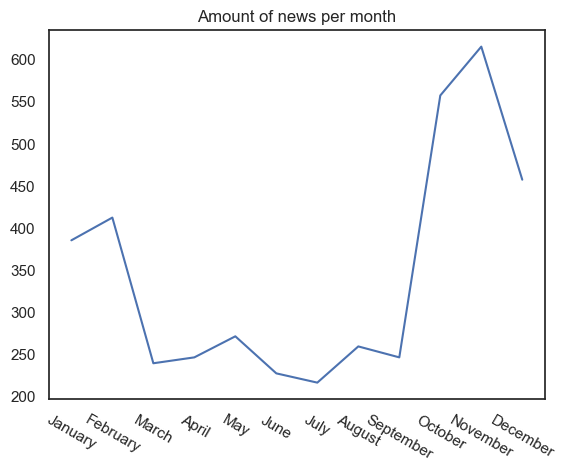

In [71]:
months_names= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_d = df.value_counts('month').sort_index()
plt.plot(months_names,monthly_d)



plt.title('Amount of news per month')
plt.xticks(rotation = -30)

plt.show()

Creating word clouds for:
1) titles
2) abstracts

In [72]:
titles_list=df['title'].to_list()
joined_titles= " ".join(titles_list)
without_meta_t= list(filter(lambda w: w not in ['metaverse','meta'], joined_titles.split()))



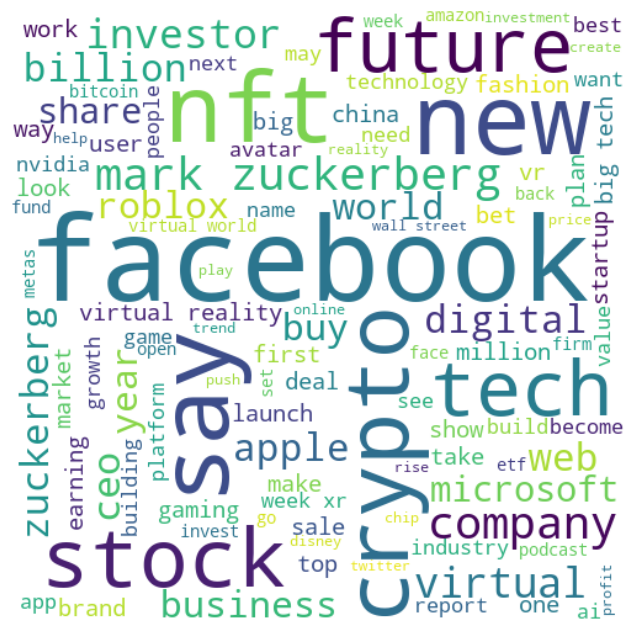

In [73]:
df_title = " ".join(without_meta_t)

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white', 
                      min_font_size = 10).generate(df_title)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
abstract_list=df['abstract'].to_list()
joined_abstract= " ".join(abstract_list)
without_meta_a= list(filter(lambda w: w not in ['metaverse','meta'], joined_abstract.split()))



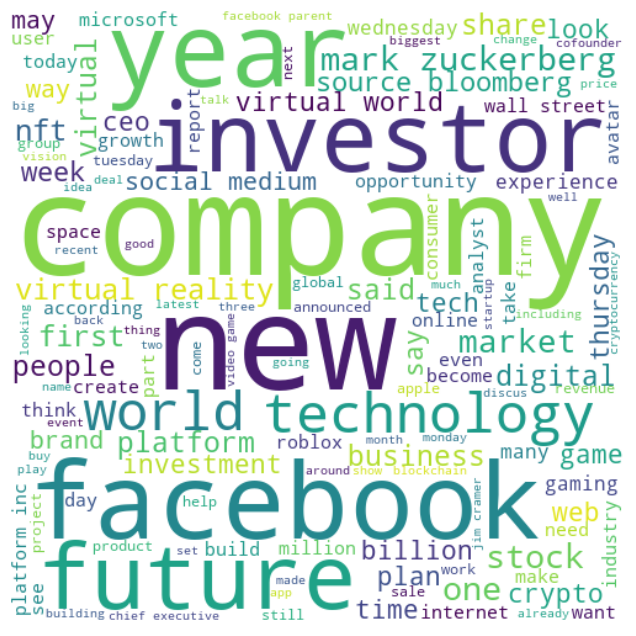

In [75]:
df_abstract =" ".join(without_meta_a)
wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white', 
                      min_font_size = 10).generate(df_abstract)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Plotting most frequent words from reviews using bar chart

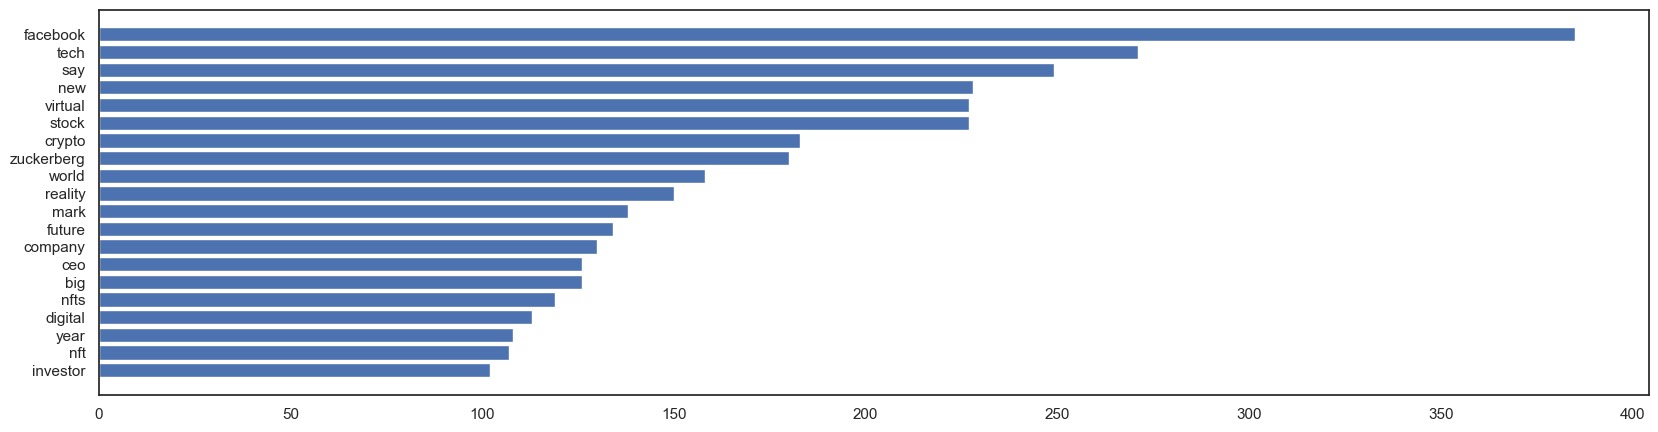

In [76]:


sb.set(style = 'white')

# Extracting words into list and counting frequency
t_without_meta_plot= df_title.split()
t_words_df = FreqDist(t_without_meta_plot)

# Extracting words and frequency from t_words_df object
t_words_df = pd.DataFrame({'word':list(t_words_df.keys()), 'count':list(t_words_df.values())})

# Subsets top 20 words by frequency
words_df_t = t_words_df.nlargest(columns="count", n = 20) 
words_df_t.sort_values('count', inplace = True)

# Plotting 20 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df_t['word'], width = words_df_t['count'])
plt.show()

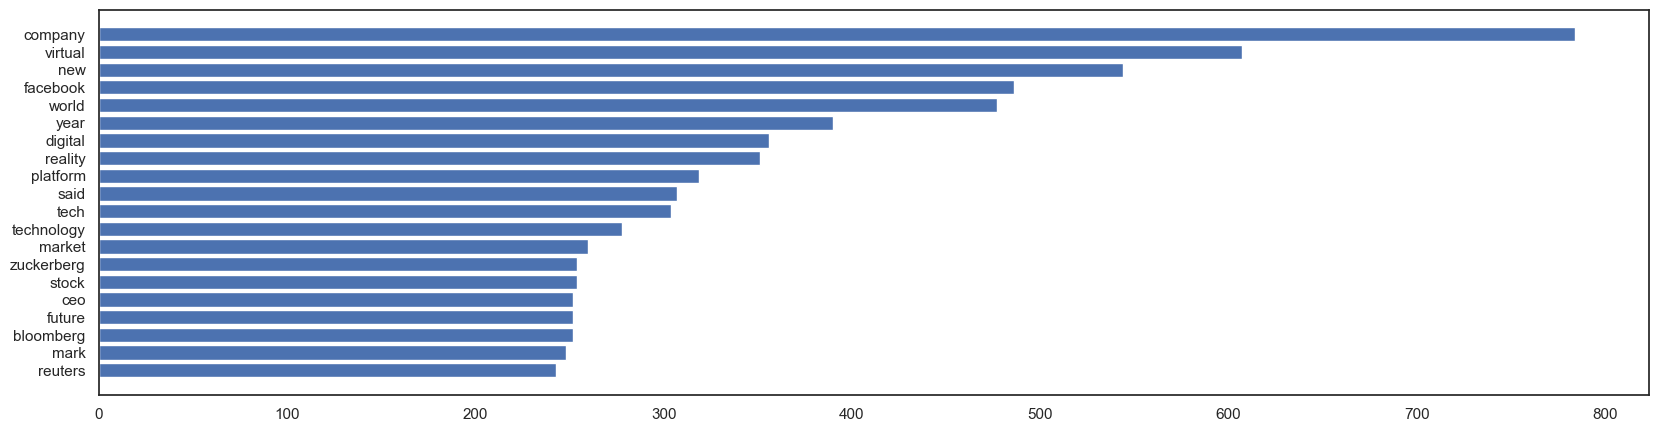

In [77]:
a_without_meta_plot= df_abstract.split()
a_words_df = FreqDist(a_without_meta_plot)

words_df = pd.DataFrame({'word':list(a_words_df.keys()), 'count':list(a_words_df.values())})

words_df_a = words_df.nlargest(columns="count", n = 20) 

words_df_a.sort_values('count', inplace = True)

plt.figure(figsize=(20,5))
ax = plt.barh(words_df_a['word'], width = words_df_a['count'])
plt.show()

Sentiment classification using DistilRoBERTa model - emotions

In [78]:
classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)


Some weights of RobertaModel were not initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
d = []
for txt in df['abstract']:
    
        content = txt
        sentiment = classifier(content )
        d.append({'abstract': content, 'label': sentiment[0]['label'], 'score': sentiment[0]['score']})


In [80]:
sentiment_emotions = pd.DataFrame.from_dict(d)

#sentiment_emotions.to_csv("abstract_robeta.csv",encoding="utf-8-sig", sep=';',index=False)

In [81]:
sentiment_emotions.groupby('label')['label'].count()

label
anger        252
disgust        5
fear         366
joy          994
neutral     1529
sadness      369
surprise     615
Name: label, dtype: int64

negative positive labelling using TextBlob

In [82]:
# function to calculate subjectivity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [83]:
final_data = pd.DataFrame(df['abstract'])

final_data['polarity'] = final_data['abstract'].apply(getPolarity) 
final_data['label'] = final_data['polarity'].apply(analysis)
final_data.head(20)

,abstract,polarity,label
0,new year likely bring challenge tech sector,0.068182,Positive
1,worldwide shipment virtual augmented reality h...,0.000000,Neutral
2,year ahead brings new guard rail crypto blockc...,0.068182,Positive
3,fortune silicon valley billionaire took beatin...,-0.500000,Negative
4,mailonline take look science behind sticking v...,-0.400000,Negative
5,turbulent year tech sector,0.000000,Neutral
6,katie paulsan jose calif dec reuters meta plat...,0.000000,Neutral
7,meta still making push building metaverse comm...,0.500000,Positive
8,dec reuters call duty maker activision blizzar...,-0.500000,Negative
9,berkeley calif ap prominent video game creator...,0.044444,Positive


In [84]:
final_data.groupby('label').count()

,abstract,polarity
label,,
Negative,843,843
Neutral,1301,1301
Positive,1986,1986


In [85]:
final_data['emotion']= sentiment_emotions['label']
final_data['newspaper']=df['newspaper']

Saving dataframe as csv for further uses

In [86]:
final_data.to_csv("sentiment.csv",encoding="utf-8-sig", sep=';',index=False)

Visualization of results 

In [87]:
df_senti = pd.read_csv('sentiment.csv', sep=';', encoding='utf-8')
df_senti.head(10)

,abstract,polarity,label,emotion,newspaper
0,new year likely bring challenge tech sector,0.068182,Positive,neutral,Mail Online
1,worldwide shipment virtual augmented reality h...,0.000000,Neutral,surprise,Mail Online
2,year ahead brings new guard rail crypto blockc...,0.068182,Positive,neutral,Mail Online
3,fortune silicon valley billionaire took beatin...,-0.500000,Negative,sadness,Mail Online
4,mailonline take look science behind sticking v...,-0.400000,Negative,neutral,Mail Online
5,turbulent year tech sector,0.000000,Neutral,fear,Mail Online
6,katie paulsan jose calif dec reuters meta plat...,0.000000,Neutral,neutral,Mail Online
7,meta still making push building metaverse comm...,0.500000,Positive,neutral,Mail Online
8,dec reuters call duty maker activision blizzar...,-0.500000,Negative,sadness,Mail Online
9,berkeley calif ap prominent video game creator...,0.044444,Positive,sadness,Mail Online


In [88]:
df_senti.groupby('emotion')['emotion'].count()

emotion
anger        252
disgust        5
fear         366
joy          994
neutral     1529
sadness      369
surprise     615
Name: emotion, dtype: int64

In [89]:
df_senti.groupby('newspaper')['newspaper'].count()

newspaper
Bloomberg          1051
CNBC                798
Financial Times     528
Forbes              898
Mail Online         593
The Times           262
Name: newspaper, dtype: int64

Plot showing the number of articles with a given sentiment considering each online news source

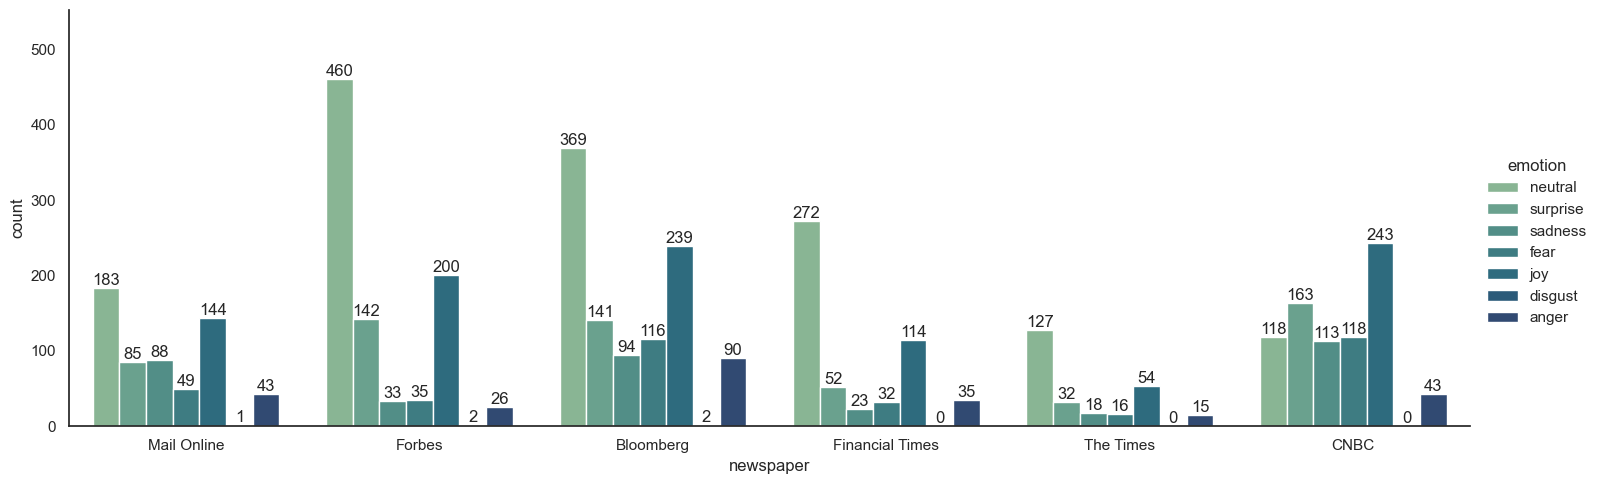

In [119]:

p = sns.catplot(x='newspaper',hue='emotion',data=df_senti,kind='count',aspect=3, palette='crest')

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

Graph showing the number of articles with a given emotion sentiment for each label neutral, positive, negative

In [102]:
df_senti.groupby(['emotion','label'])['emotion'].count()

emotion   label   
anger     Negative     77
          Neutral      79
          Positive     96
disgust   Negative      1
          Neutral       1
          Positive      3
fear      Negative     91
          Neutral     118
          Positive    157
joy       Negative    181
          Neutral     229
          Positive    584
neutral   Negative    209
          Neutral     661
          Positive    659
sadness   Negative    155
          Neutral      81
          Positive    133
surprise  Negative    129
          Neutral     132
          Positive    354
Name: emotion, dtype: int64

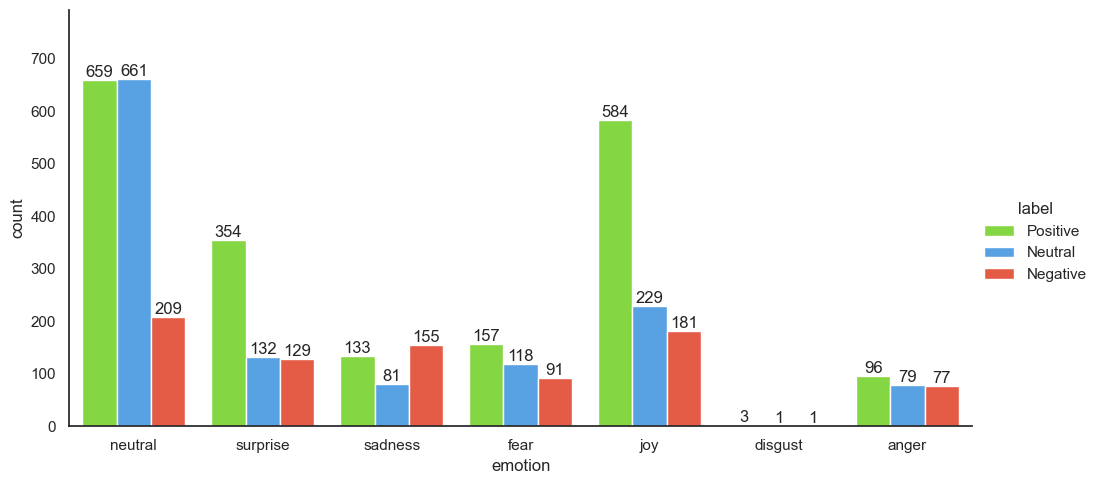

In [120]:

palette = ["#81EF29","#41A4FA","#FF492C"]
p = sns.catplot(x='emotion',hue='label',data=df_senti,kind='count',aspect=2, palette=palette)

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

Extracting most common words associated with each emotion

In [111]:
def without_topic_words(txt):
    topic_words=  ['metaverse','meta']
    return list(filter(lambda w: w not in topic_words, txt.split()))


def get_keywords(txt, num=50):
    tokens= without_topic_words(txt)
    most_cmmn= Counter(tokens).most_common(num)
    return dict(most_cmmn)

In [112]:
emotions = df_senti['emotion'].unique().tolist()
emotions

['neutral', 'surprise', 'sadness', 'fear', 'joy', 'disgust', 'anger']

In [113]:
surprise_words=df_senti[df_senti['emotion']=='surprise']['abstract'].to_list()
fear_words = df_senti[df_senti['emotion']=='fear']['abstract'].to_list()
anger_words= df_senti[df_senti['emotion']=='anger']['abstract'].to_list()
sadness_words= df_senti[df_senti['emotion']=='sadness']['abstract'].to_list()
#neutral_words=df_senti[df_senti['emotion']=='neutral']['abstract'].to_list()
joy_words=df_senti[df_senti['emotion']=='joy']['abstract'].to_list()
disgust_words=df_senti[df_senti['emotion']=='disgust']['abstract'].to_list()

In [114]:
surprise_text= ' '.join(surprise_words)
fear_text= ' '.join(fear_words)
anger_text= ' '.join(anger_words)
sadness_text= ' '.join(sadness_words)
#neutral_text= ' '.join(neutral_words)
joy_text= ' '.join(joy_words)
disgust_text= ' '.join(disgust_words)



In [115]:
keywords_surprise=get_keywords(surprise_text)
keywords_fear=get_keywords(fear_text)
keywords_anger=get_keywords(anger_text)
keywords_sadness=get_keywords(sadness_text)
keywords_joy=get_keywords(joy_text)
keywords_disgust=get_keywords(disgust_text)



In [126]:
def plot_common_words(dict):
    df=pd.DataFrame(dict.items(), columns=['token','count'])
    plt.figure(figsize=(15,10))
    sns.barplot(x='count',y='token',data=df,palette=['blue'])
    plt.show()

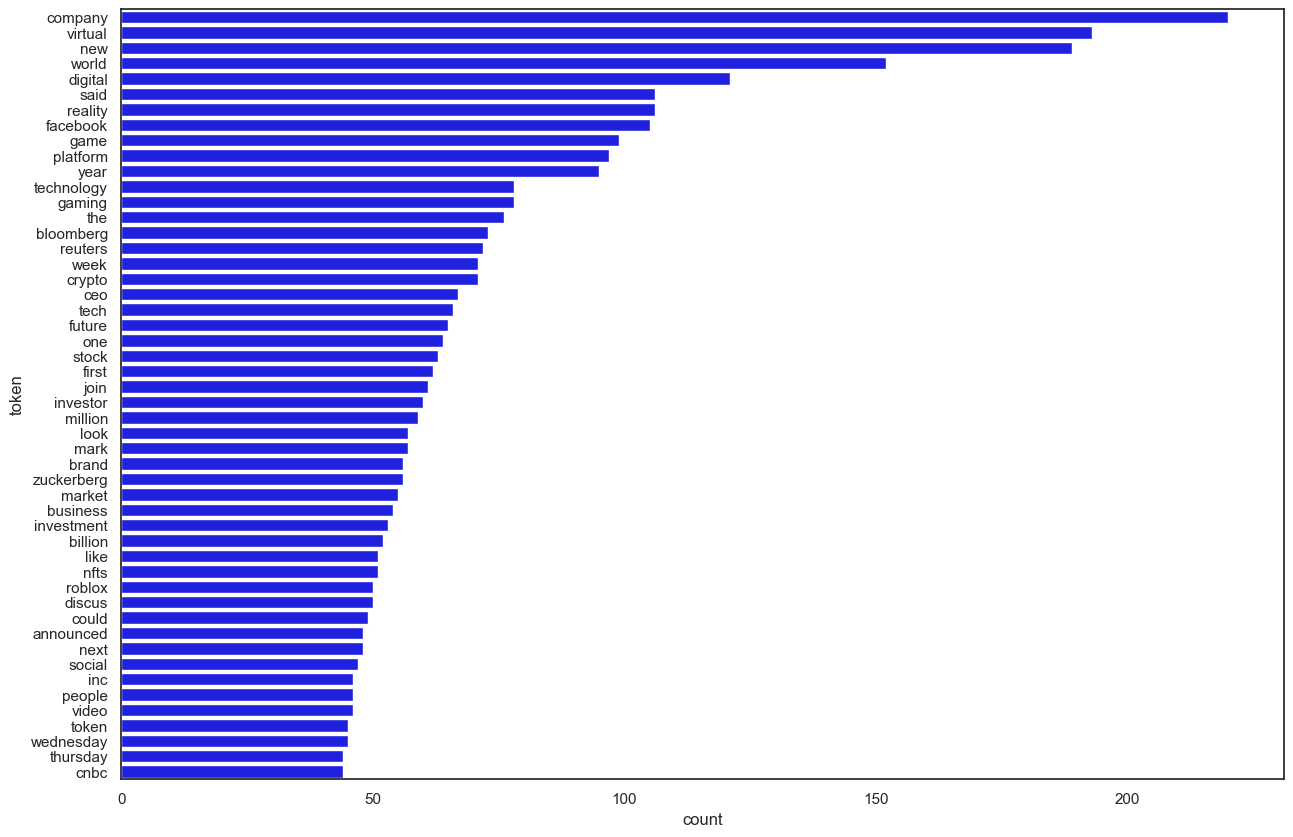

In [127]:
plot_common_words(keywords_joy)

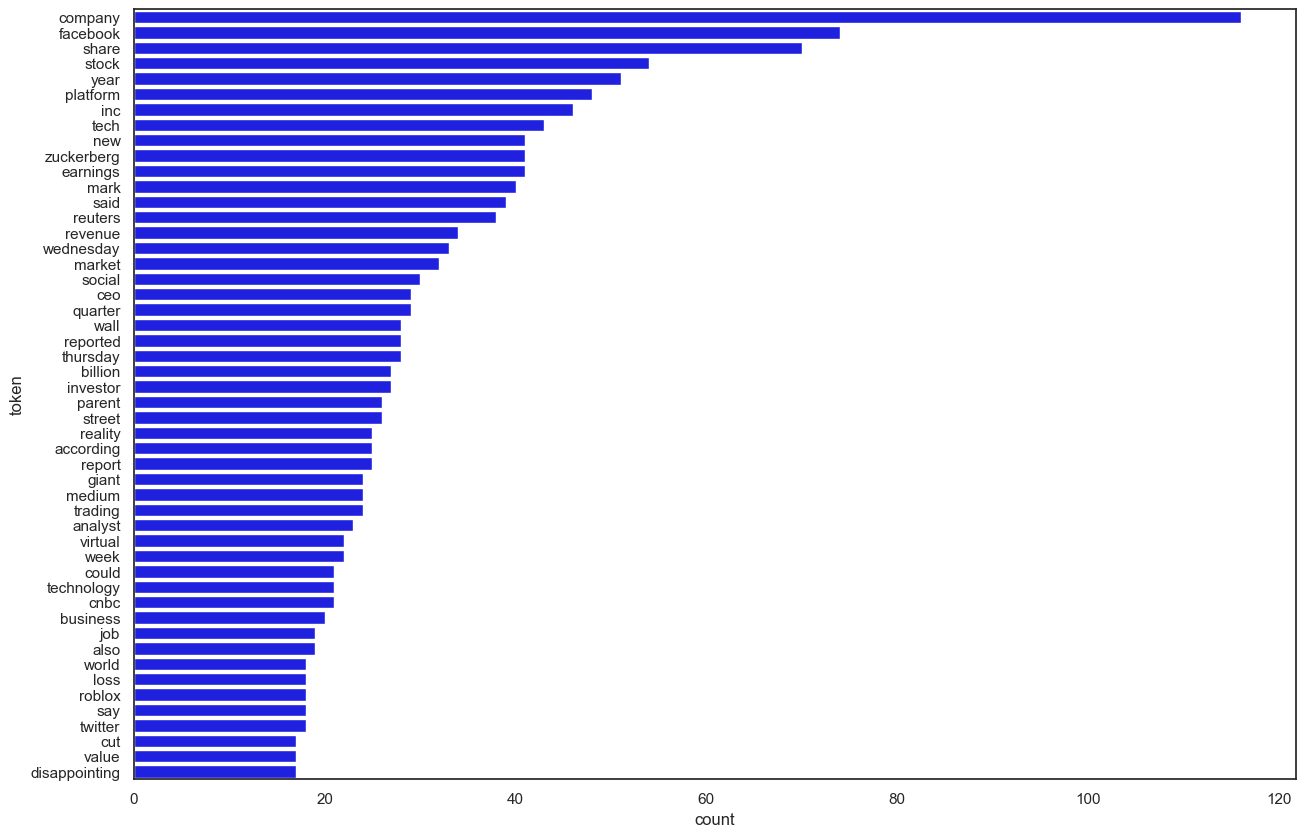

In [128]:
plot_common_words(keywords_sadness)